# Chapter 04 推測統計の基本 second

これまでは __記述統計__ が中心だったが  
これからは __推測統計__ に入っていく.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [2]:
df = pd.read_csv('../data/ch4_scores400.csv')
scores = np.array(df['点数'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80])

## 4.1　|　母集団と標本

推測したい観測対象全体を__母集団__  
推測に使う観測対象の一部分のことを__標本__ という.  

母集団から標本を取り出すことを__標本抽出__  
取り出す標本の数のことを__標本の大きさ__ , __サンプルサイズ__
という.

標本から計算される平均や分布, 相関係数などを  
__標本統計量__,

母集団の平均や分散, 相関係数などを  
__母数__ という.

標本平均で母平均を推測するとき,  
標本平均は母平均の__推定量__であるという.

実際に標本のデータを用いて計算した結果を__推定値__ という.

### 4.1.1　標本の抽出方法

ランダムに標本を抽出する方法を__無作為抽出__という.

複数回同じ標本を選ぶ方法を__復元抽出__  
同じ標本は一度しか選ばない方法を__非復元抽出__  
という.

In [3]:
# 無作為抽出
print(np.random.choice([1, 2, 3, 4, 5], 3))
print(np.random.choice(np.random.randn(10), 3))

[4 4 1]
[0.196 0.196 0.196]


In [4]:
# 非復元抽出
np.random.choice([1, 2, 3, 4, 5], 3, replace=False)

array([5, 4, 3])

In [5]:
# シード値設定
np.random.seed(0)
np.random.choice([1, 2, 3, 4, 5], 3)

array([5, 1, 4])

In [6]:
np.random.seed(0)
sample = np.random.choice(scores, 20)
sample.mean()

70.4

In [7]:
scores.mean()

69.53

In [8]:
for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f'{i + 1} 回目 標本平均', sample.mean())

1 回目 標本平均 72.45
2 回目 標本平均 63.7
3 回目 標本平均 66.05
4 回目 標本平均 71.7
5 回目 標本平均 74.15


## 4.2　|　確率モデル

### 4.2.1　確率の基本

__互いに排反__ とは  
それぞれの事象が同時に起こり得ないとういこと.

### 4.2.2　確率分布

__確率分布__ とは確率変数がどのような振る舞いをするのかを表したもの.

In [9]:
# イカサマサイコロ

dice = [1, 2, 3, 4, 5, 6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

In [13]:
np.random.choice(dice, p=prob)

4

In [14]:
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([5, 5, 6, 6, 3, 5, 6, 5, 6, 6, 2, 3, 1, 6, 5, 6, 3, 4, 5, 3, 4, 3,
       5, 5, 4, 4, 6, 4, 6, 5, 6, 5, 4, 6, 2, 6, 4, 5, 3, 4, 6, 5, 5, 5,
       3, 4, 5, 4, 4, 6, 4, 4, 6, 6, 2, 2, 4, 5, 1, 6, 4, 3, 2, 2, 6, 3,
       5, 4, 2, 4, 4, 6, 6, 1, 5, 3, 6, 6, 4, 2, 1, 6, 4, 4, 2, 4, 1, 3,
       6, 6, 6, 4, 5, 4, 3, 3, 4, 6, 6, 5])

In [15]:
freq, _ = np.histogram(sample, bins=6, range=(1, 7))
pd.DataFrame({'度数':freq,
             '相対度数':freq / num_trial},
            index=pd.Index(np.arange(1, 7), name='出目'))

,度数,相対度数
出目,,
1,5,0.05
2,9,0.09
3,13,0.13
4,25,0.25
5,20,0.20
6,28,0.28


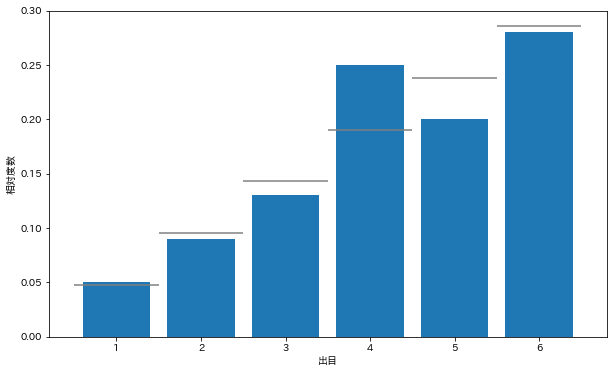

In [18]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)

ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')

ax.set_xticks(np.linspace(1.5, 6.5, 6))

ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('出目')
ax.set_ylabel('相対度数')
plt.show()

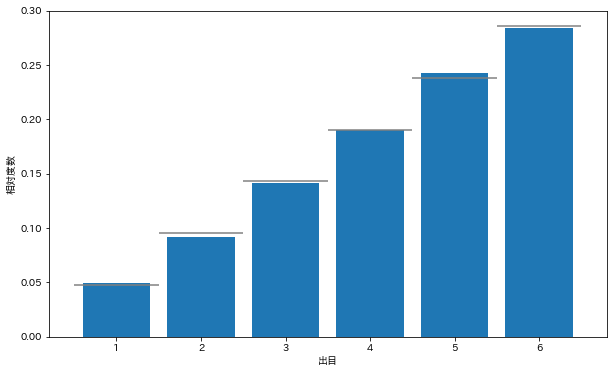

In [19]:
num_trial = 10000
sample = np.random.choice(dice, size=num_trial, p=prob)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)

ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')

ax.set_xticks(np.linspace(1.5, 6.5, 6))

ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('出目')
ax.set_ylabel('相対度数')
plt.show()

## 4.3　|　推測統計における確率

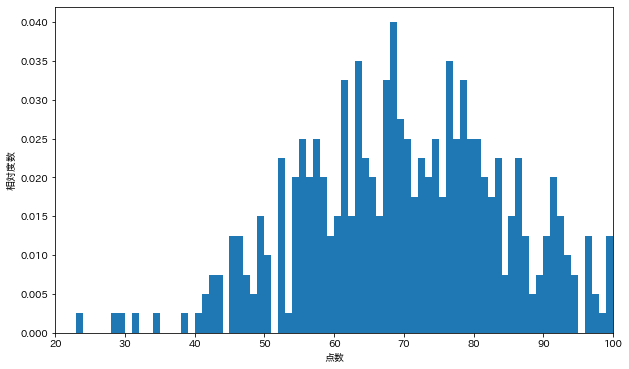

In [21]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('点数')
ax.set_ylabel('相対度数')
plt.show()

In [22]:
np.random.choice(scores)

76

Text(0, 0.5, '相対度数')

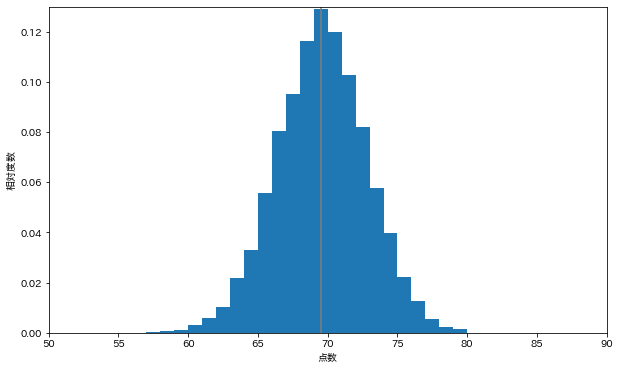

In [23]:
 sample_means = [np.random.choice(scores, 20).mean()
                for _ in range(10000)]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0, 100), density=True)

ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)

ax.set_xlabel('点数')
ax.set_ylabel('相対度数')